In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
%matplotlib inline

In [90]:
data=pd.read_csv('../data/btc_data_lastest_10-21.csv',sep=',')

In [94]:
data.interpolate(axis=0,inplace=True)

In [95]:
data
#interval3=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2019/12/31')

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0,2010/07/17,0.0495,235,649.653,390,1.815430e+02,2.775561e+09,154298.000,1.193000e+03,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,2010/07/18,0.0726,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.612000e+03,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,2010/07/19,0.0859,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.047000e+03,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,2010/07/20,0.0783,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
4,4,2010/07/21,0.0767,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,4016,2021/07/15,32109.0000,226106,739841.000,429187,1.436303e+13,1.064871e+20,0.248,1.636380e+10,...,11.713,31.785,39.279,40.795,46.050,-4.724,-2.391,-4.808,-20.133,-47.985
4017,4017,2021/07/16,31750.0000,223316,562742.000,413909,1.436303e+13,1.022059e+20,0.297,1.223106e+10,...,8.294,28.799,37.921,40.289,45.880,-3.364,-4.260,-4.610,-19.462,-48.209
4018,4018,2021/07/17,31556.0000,181904,475044.000,339875,1.434854e+13,1.092444e+20,0.262,1.530399e+10,...,6.705,27.187,37.172,40.011,45.788,-2.872,-6.377,-7.995,-18.264,-43.734
4019,4019,2021/07/18,31763.0000,160978,480527.000,307130,1.367259e+13,9.718538e+19,0.298,7.945136e+09,...,28.617,31.936,38.568,40.465,45.906,-1.078,-6.011,-9.944,-14.166,-43.669


In [99]:
df=data#.loc[interval3]
df = df.drop(["Unnamed: 0"], axis=1)

In [100]:
df

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,1.815430e+02,2.775561e+09,154298.000,1.193000e+03,0.000010,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2010/07/18,0.0726,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.612000e+03,0.000243,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2010/07/19,0.0859,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.047000e+03,0.000022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2010/07/20,0.0783,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,0.000000,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
4,2010/07/21,0.0767,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,0.000000,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,2021/07/15,32109.0000,226106,739841.000,429187,1.436303e+13,1.064871e+20,0.248,1.636380e+10,3.227000,...,11.713,31.785,39.279,40.795,46.050,-4.724,-2.391,-4.808,-20.133,-47.985
4017,2021/07/16,31750.0000,223316,562742.000,413909,1.436303e+13,1.022059e+20,0.297,1.223106e+10,2.458000,...,8.294,28.799,37.921,40.289,45.880,-3.364,-4.260,-4.610,-19.462,-48.209
4018,2021/07/17,31556.0000,181904,475044.000,339875,1.434854e+13,1.092444e+20,0.262,1.530399e+10,2.188000,...,6.705,27.187,37.172,40.011,45.788,-2.872,-6.377,-7.995,-18.264,-43.734
4019,2021/07/18,31763.0000,160978,480527.000,307130,1.367259e+13,9.718538e+19,0.298,7.945136e+09,2.380000,...,28.617,31.936,38.568,40.465,45.906,-1.078,-6.011,-9.944,-14.166,-43.669


In [101]:
X=df.iloc[:,2:]

In [106]:
#X.head()
X

,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,235,649.653,390,1.815430e+02,2.775561e+09,154298.000,1.193000e+03,0.000010,0.000,8.324,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.612000e+03,0.000243,0.000,8.372,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.047000e+03,0.000022,0.000,8.276,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,0.000000,0.000,7.956,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
4,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,0.000000,0.000,6.957,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,226106,739841.000,429187,1.436303e+13,1.064871e+20,0.248,1.636380e+10,3.227000,0.770,11.250,...,11.713,31.785,39.279,40.795,46.050,-4.724,-2.391,-4.808,-20.133,-47.985
4017,223316,562742.000,413909,1.436303e+13,1.022059e+20,0.297,1.223106e+10,2.458000,0.574,9.600,...,8.294,28.799,37.921,40.289,45.880,-3.364,-4.260,-4.610,-19.462,-48.209
4018,181904,475044.000,339875,1.434854e+13,1.092444e+20,0.262,1.530399e+10,2.188000,0.415,10.070,...,6.705,27.187,37.172,40.011,45.788,-2.872,-6.377,-7.995,-18.264,-43.734
4019,160978,480527.000,307130,1.367259e+13,9.718538e+19,0.298,7.945136e+09,2.380000,0.325,10.000,...,28.617,31.936,38.568,40.465,45.906,-1.078,-6.011,-9.944,-14.166,-43.669


In [104]:
estimators=[]

In [105]:
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])

In [107]:
scale=Pipeline(estimators)

In [145]:
X=scale.fit_transform(X)
X.shape

(4021, 735)

In [140]:
pca = PCA(n_components=20,random_state=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [141]:
pca.explained_variance_ratio_

array([0.56078829, 0.10289788, 0.05792784, 0.03072168, 0.02683936,
       0.02138617, 0.01537361, 0.01205548, 0.01094043, 0.01072399,
       0.00949396, 0.00889747, 0.00833548, 0.0069999 , 0.00658771,
       0.00567771, 0.00520441, 0.00469599, 0.00432573, 0.00397169])

In [142]:
np.cumsum(pca.explained_variance_ratio_)

array([0.56078829, 0.66368617, 0.72161401, 0.75233569, 0.77917505,
       0.80056122, 0.81593483, 0.82799031, 0.83893074, 0.84965474,
       0.85914869, 0.86804616, 0.87638164, 0.88338154, 0.88996924,
       0.89564695, 0.90085137, 0.90554735, 0.90987308, 0.91384478])

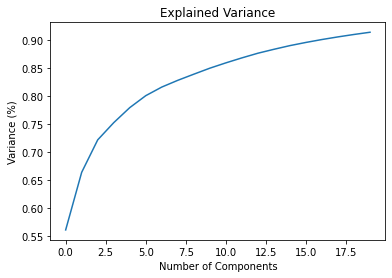

In [143]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [144]:
df_pca=pd.DataFrame(pca.components_).transpose()
#df_pca
pca.components_.shape


(20, 735)

In [114]:
df_pca.columns=['comp_1','comp_2','comp_3','comp_4','comp_5','comp_6']

In [130]:
y=df.iloc[:,1:2]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
4016,32109.0000
4017,31750.0000
4018,31556.0000
4019,31763.0000


In [116]:
y.reset_index(drop=True,inplace=True)

In [117]:
df_pca['priceUSD']=y

In [129]:
df_pca#.head()
df_pca

,0,1,2,3,4,5
0,0.074775,-0.058775,-0.016531,-0.026882,-0.018071,0.034708
1,0.103432,-0.097974,0.025112,0.008138,-0.009610,0.003282
2,0.078321,-0.038384,-0.004899,-0.021897,-0.021560,0.029447
3,0.067936,0.089468,-0.090909,-0.044743,0.002120,0.014904
4,0.061687,0.077842,-0.084008,-0.046213,0.004950,0.022246
...,...,...,...,...,...,...
730,-0.001295,-0.000340,0.002602,-0.019538,-0.038799,0.003735
731,-0.001762,0.000120,0.004275,-0.024795,-0.043307,0.008868
732,-0.003230,0.001722,0.010100,-0.043204,-0.061048,0.020726
733,-0.003967,0.004433,0.015102,-0.047064,-0.047419,0.026758


In [89]:
df_pca.to_csv('pca_all_reg.csv',index=False)

# Classification

In [35]:
one=data['priceUSD'].shift(-1,fill_value=1)

In [36]:
df['one']=one.loc[interval3]

In [37]:
df['difference']=((df['one']-df['priceUSD'])/df['priceUSD'])*100

In [38]:
df.reset_index(drop=True,inplace=True)

In [39]:
category=[]
for x in range(len(df['difference'])):
    if df['difference'][x]>=0:
        category.append(1)
    else:
        category.append(0)

In [40]:
sum(category)

1332

In [41]:
df['category']=pd.DataFrame(category)

In [42]:
df.tail()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,one,difference,category
2461,2019/12/27,7263.0,322059,709273.0,415723,1.294859e+13,9.725392e+19,0.137,3.906419e+09,0.386,...,42.961,46.220,-1.348,0.717,0.076,-0.081,-11.109,7361.0,1.349305,1
2462,2019/12/28,7361.0,298138,625161.0,376120,1.294859e+13,9.517417e+19,0.145,3.214321e+09,0.341,...,44.575,46.608,1.080,2.124,2.180,-2.562,-9.029,7469.0,1.467192,1
2463,2019/12/29,7469.0,279770,552879.0,344377,1.294859e+13,1.010148e+20,0.144,2.491859e+09,0.337,...,46.295,47.031,2.631,2.658,4.788,-1.656,-7.569,7388.0,-1.084483,0
2464,2019/12/30,7388.0,324331,661326.0,418908,1.294859e+13,1.018722e+20,0.152,4.650041e+09,0.362,...,45.205,46.750,1.722,-1.875,4.286,-3.716,-11.675,7293.0,-1.285869,0
2465,2019/12/31,7293.0,293302,687065.0,375764,1.294859e+13,9.877266e+19,0.135,3.430133e+09,0.369,...,43.938,46.417,-0.935,-0.948,6.402,-0.922,-11.770,7238.0,-0.754148,0


In [43]:
df['priceUSD']=df['category']

In [44]:
df.drop(columns=['category','one','difference'],inplace=True)

In [45]:
df.head(3)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2013/04/01,1,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,127826531.0,0.0777,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
1,2013/04/02,1,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,257306533.0,0.1050,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
2,2013/04/03,1,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,252194497.0,0.1330,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284


In [46]:
X=df.iloc[:,2:]

In [47]:
X.head()

,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,127826531.0,0.0777,0.0474,7.273,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
1,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,257306533.0,0.1050,0.0539,7.956,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
2,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,252194497.0,0.1330,0.0600,8.229,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
3,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,226470029.0,0.1410,0.0618,9.351,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
4,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,227376421.0,0.1200,0.0643,9.114,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [48]:
estimators=[]

In [49]:
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])

In [50]:
scale=Pipeline(estimators)

In [51]:
X=scale.fit_transform(X)

In [52]:
pca = PCA(n_components=50,random_state=7)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=7,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca.explained_variance_ratio_

array([0.43576036, 0.1252282 , 0.09187037, 0.04416477, 0.03043267,
       0.02547609, 0.01863892, 0.01581986, 0.01563365, 0.01334473,
       0.01187705, 0.01069119, 0.01017374, 0.00839536, 0.00728353,
       0.00707281, 0.00636951, 0.0057943 , 0.00554886, 0.00450537,
       0.00439273, 0.00401077, 0.00374706, 0.00367745, 0.00322177,
       0.00308975, 0.00300508, 0.00292557, 0.00273808, 0.00264708,
       0.00234487, 0.00233418, 0.00221805, 0.00199575, 0.00189007,
       0.00185921, 0.00176406, 0.00169029, 0.00162665, 0.00157117,
       0.00145411, 0.00142842, 0.00140279, 0.00132751, 0.00127813,
       0.00117433, 0.00109586, 0.00103543, 0.00099577, 0.00098119])

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.43576036, 0.56098856, 0.65285893, 0.69702371, 0.72745638,
       0.75293246, 0.77157138, 0.78739124, 0.80302489, 0.81636962,
       0.82824667, 0.83893787, 0.84911161, 0.85750697, 0.8647905 ,
       0.87186331, 0.87823283, 0.88402712, 0.88957598, 0.89408135,
       0.89847408, 0.90248485, 0.90623191, 0.90990937, 0.91313114,
       0.91622089, 0.91922597, 0.92215154, 0.92488962, 0.9275367 ,
       0.92988157, 0.93221575, 0.9344338 , 0.93642955, 0.93831961,
       0.94017882, 0.94194288, 0.94363316, 0.94525981, 0.94683098,
       0.94828509, 0.94971351, 0.9511163 , 0.95244381, 0.95372194,
       0.95489627, 0.95599213, 0.95702756, 0.95802334, 0.95900452])

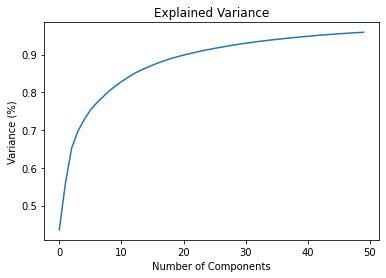

In [55]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [56]:
df_pca=pd.DataFrame(pca.components_).transpose()

In [57]:
y=df.iloc[:,1:2]

In [58]:
y.reset_index(drop=True,inplace=True)

In [59]:
df_pca['priceUSD']=y

In [60]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,priceUSD
0,0.074171,0.008777,-0.049869,0.041858,0.006174,-0.015147,0.001751,-0.044314,-0.013876,-0.036343,...,-0.002013,-0.031450,-0.014847,-0.003778,-0.013133,0.021469,-0.024890,0.014720,-0.019402,1
1,0.095193,0.061928,-0.086386,-0.016615,0.022650,-0.056025,0.055454,-0.008358,0.046442,-0.008777,...,-0.007573,0.051538,0.059347,-0.011647,0.017515,-0.005986,-0.000929,0.022219,-0.017904,1
2,0.065050,0.023159,-0.041601,0.018874,0.027486,-0.016288,-0.002517,-0.031560,-0.008988,-0.034234,...,0.011695,-0.012253,-0.012558,0.018146,-0.014875,0.001199,-0.003989,0.034927,-0.013755,1
3,0.065793,-0.117876,0.023314,0.035992,-0.001258,0.011415,-0.000956,0.003557,0.013841,-0.009887,...,0.006306,-0.002982,0.005749,0.003263,-0.013797,-0.005878,-0.003490,0.013362,0.001520,1
4,0.059723,-0.105186,0.023880,0.032610,-0.004796,0.006095,-0.005974,-0.002132,-0.001001,-0.017178,...,0.001991,-0.017271,0.009070,-0.013272,-0.019641,0.014263,0.001708,-0.013810,-0.007797,1


In [61]:
df_pca.to_csv('../data/pca_75_clas.csv',index=False)